# Project MRI classification

## Headers

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
from sklearn.model_selection import train_test_split as tts


## Label encoding

In [78]:
labels={}
for i,Class in enumerate(os.listdir('I:/New/')):
    if Class in labels:
        pass
    else:
        labels[Class]=i
        
    

In [79]:
labels

{'non tumor': 0, 'tumor': 1}

## Elliptical cropping function

In [80]:
def crop_img(image,size):
    mask = np.zeros_like(image)
    # create a white filled ellipse
    mask=cv2.ellipse(mask, center=(size//2, size//2), axes=(38,50),
                     angle=0, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)
    result = np.bitwise_and(image,mask)  
    # Bitwise AND operation to black out regions outside the mask
    return cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    
    

## Loading Images

In [81]:
Img_data=[]
Img_data1=[]
Img_label=[]
for Class in labels:
    path="I:/New/"+Class
    for name in os.listdir(path):
        I=cv2.imread(path+"/"+name)
        I=np.array(cv2.resize(I,(128,128)))
        Img_data1.append(I)
        I=crop_img(I,128)
        Img_data.append( I)
        Img_label.append(labels[Class])

Img_data=np.array(Img_data)
Img_label=np.array(Img_label)

In [82]:
print(type(Img_data))

<class 'numpy.ndarray'>


In [83]:
print(Img_data.shape)
print(Img_label.shape)

(3031, 128, 128, 3)
(3031,)


## Image data Distribution

([<matplotlib.patches.Wedge at 0x23b45a31d90>,
 [Text(-0.01767140255137672, 1.0998580460822514, 'non tumor'),
  Text(0.017671505527518293, -1.0998580444277304, 'tumor')],
 [Text(-0.009638946846205483, 0.5999225705903188, '50.51%'),
  Text(0.009639003015009976, -0.5999225696878528, '49.49%')])

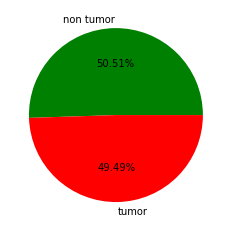

In [84]:
name=list(labels.keys())
length=[]
for key in name:
    length.append(sum(Img_label==labels[key]))
# length=[sum(Img_label==0),sum(Img_label==1)]
plt.pie(length, labels=name,colors=("green","red",),autopct='%1.2f%%',)

In [85]:
length

[1531, 1500]

## Original vs Cropped Visualization

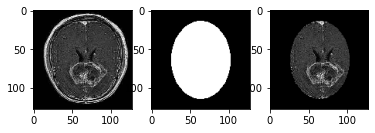

In [86]:
image = Img_data1[2999]
mask=np.ones_like(image)*255
mask=crop_img(mask,128)
result=crop_img(image,128)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(image_rgb)
plt.subplot(132)
plt.imshow(mask_rgb)
plt.subplot(133)
plt.imshow(result_rgb)
plt.show()

Text(0.5, 1.0, 'having tumor')

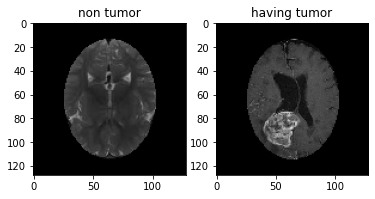

In [87]:
plt.subplot(1,2,1)
plt.imshow(Img_data[1]) 
plt.title('non tumor')

plt.subplot(1,2,2)
plt.imshow(Img_data[1717]) 
plt.title('having tumor')


## Histogram function

In [88]:
def hist(I):       #2D
    if len(I.shape)>2:
        I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
    H=np.zeros((256,1))
    for x in np.nditer(I):
        if x>255:
            x=255
        elif x<0:
            x=0
        H[int(x)]=H[int(x)]+1
    return H

## Visualization function

In [111]:
def Visualize(dataset,name,gray=False):
    fig = plt.figure(figsize=[25,10])
    plt.subplot(2,4,1)
    plt.imshow(Img_data[17]) 
    plt.axis('off')
    plt.title('original image non tumor')
    
    plt.subplot(2,4,2)
    plt.plot(hist(Img_data[17]))
    plt.ylim([0,500])
    plt.title('original image non tumor Histogram')

    plt.subplot(2,4,3)
    plt.imshow(dataset[17],cmap='gray') if gray else imshow(cv2.cvtColor(dataset[17]))
    plt.axis('off')
    plt.title('after '+name)
    
    plt.subplot(2,4,4)
    plt.plot(hist(dataset[17]))
    plt.ylim([0,500])
    plt.title('after '+name+ "Histogram")

    plt.subplot(2,4,5)
    plt.imshow(Img_data[1717])
    plt.axis('off')
    plt.title('original image with tumor')

    plt.subplot(2,4,6)
    plt.plot(hist(Img_data[1717]))
    plt.ylim([0,500])
    plt.title('original image with tumor Histogram')

    plt.subplot(2,4,7)
    plt.imshow(dataset[1717],cmap='gray') if gray else imshow(cv2.cvtColor(dataset[1717]))
    plt.axis('off')
    plt.title('after '+name)
    
    plt.subplot(2,4,8)
    plt.plot(hist(dataset[1717]))
    plt.ylim([0,500])
    plt.title('after '+name+ "Histogram")


## Convolution Function

In [91]:
def convolution(image,filt,s = 1):
    (m,n) = image.shape
#     print(m,n)
    (h,w) = filt.shape
#     print(h,w)
    oh = int((m-h)/s)+1
    ow=int((n-w)/s)+1
#     print(oh,ow)
    y = np.zeros([oh,ow])
    y1 = y2 = 0
    while y1 + h <= m:
        x1 = x2 = 0
        while x1 + h <= m:
#             print(y2,x2)
            y[y2,x2] = np.sum(filt[:,:]*image[y1:y1+h,x1:x1+h])
            x1 += s
            x2 += 1
        y1 += s
        y2 += 1

    return y    

In [92]:
def complete_state(i,num):
    print((i//num)*100,"% completed",end="\r")

# Preprocessing

##  RGB->Grayscale

In [93]:
grayscaled=[]
for image in Img_data:
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    grayscaled.append(gray_image)
(np.array(grayscaled)).shape
num=len(grayscaled)

In [94]:
num

3031

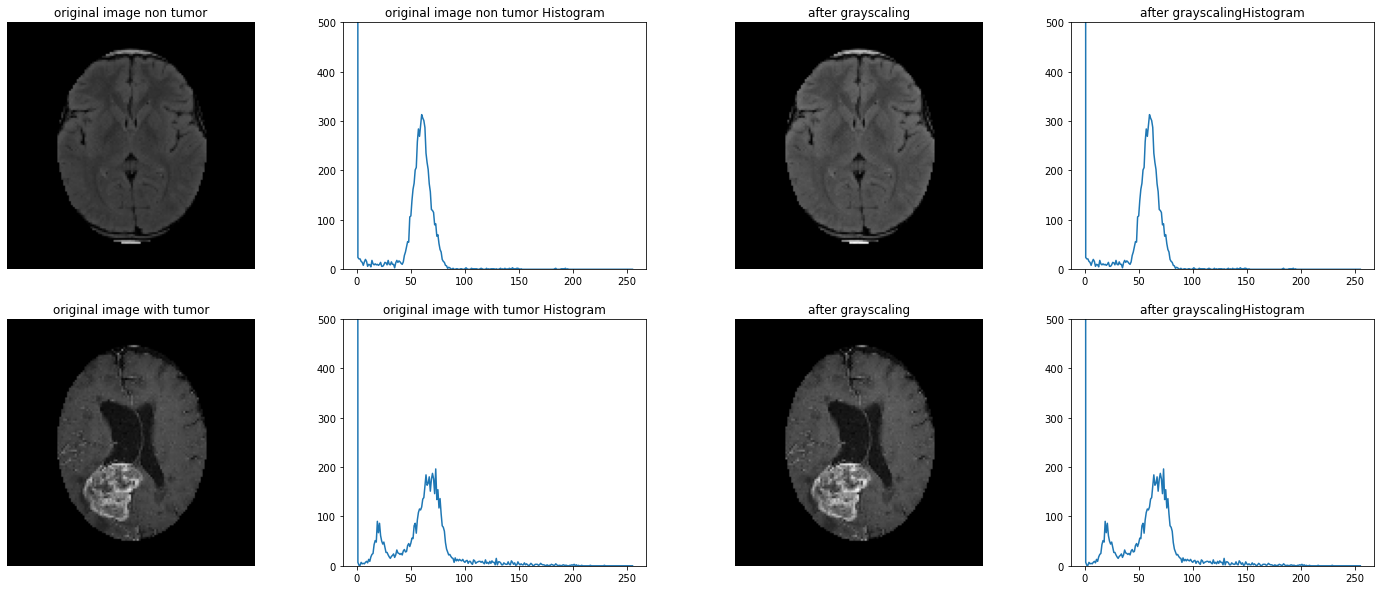

In [112]:
 Visualize(grayscaled,'grayscaling',True)

In [20]:
# erosion= []
# import math
# kernel = np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]],np.uint8)
# for i,image in enumerate(grayscaled):
#     erosion_img = convolution(image,kernel,s = 1)
#     erosion.append(erosion_img)
#     print((math.ceil((i/num)*100)),"% completed",end="\r")
    



In [21]:
# kernel.shape

## Morphological Erosion operation

In [115]:
erosion= []
kernel = np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]],np.uint8)
for image in grayscaled:
#     erosion_img = cv2.dilate(image,kernel,iterations = 1)
    erosion_img = cv2.morphologyEx(image , cv2.MORPH_CLOSE, kernel,iterations=2)
    erosion.append(erosion_img)


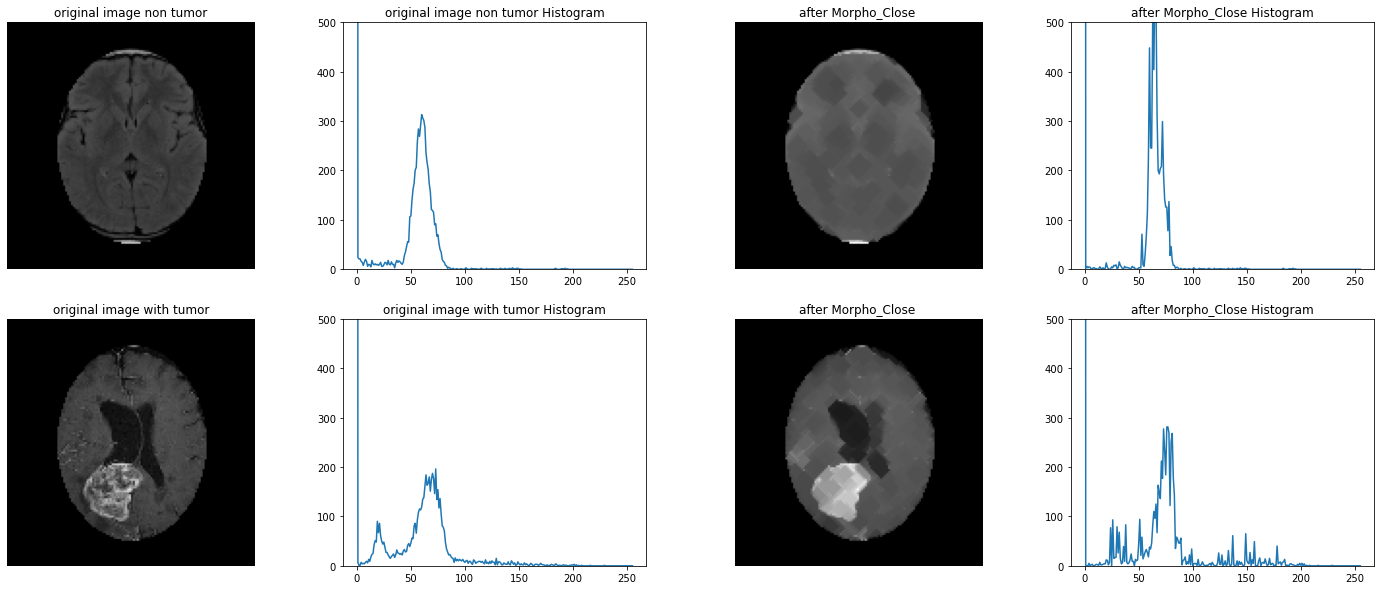

In [122]:
Visualize(erosion,'Morpho_Close ',True)

## Otsu Thresholding

In [100]:
thresholded=[]
for image in grayscaled:
    thresh, binaryImg = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
    ret, image = cv2.threshold(image,thresh-20,255,cv2.THRESH_TOZERO)
    thresholded.append(image)
(np.array(thresholded)).shape

(3031, 128, 128)

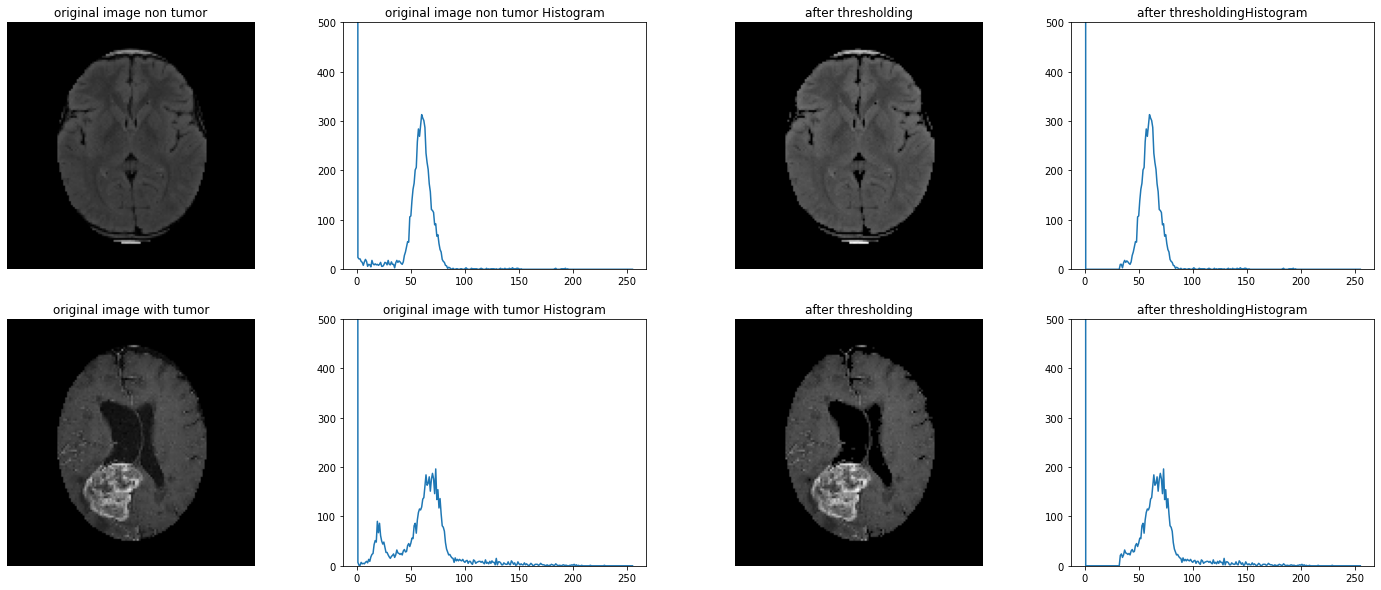

In [114]:
 Visualize(thresholded,'thresholding',True)

## Sobel Filter

In [102]:
SOBEL=[]
for image in grayscaled:
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    SOBEL.append(sobelx)


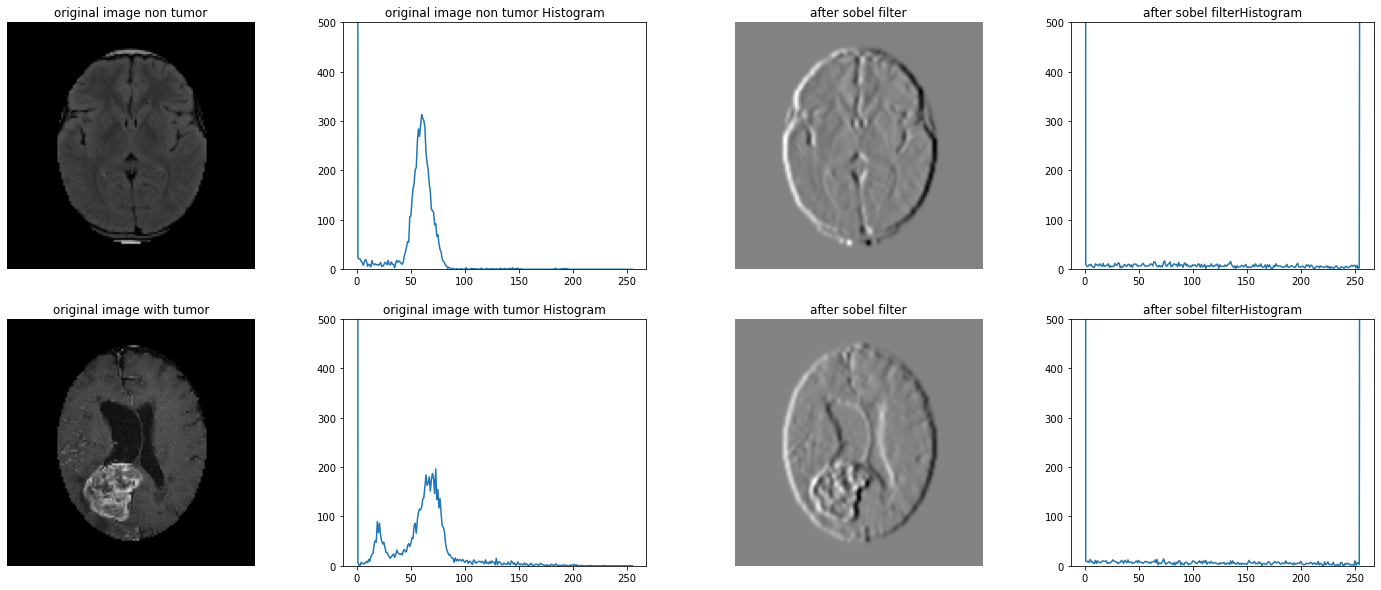

In [117]:
 Visualize(SOBEL,'sobel filter',True)

## Adaptive Histogram Equilization

In [104]:
Histeq=[]
for idx, image in enumerate(grayscaled):
    image_histogram = cv2.equalizeHist(image)
    Histeq.append(image_histogram)
(np.array(Histeq)).shape

(3031, 128, 128)

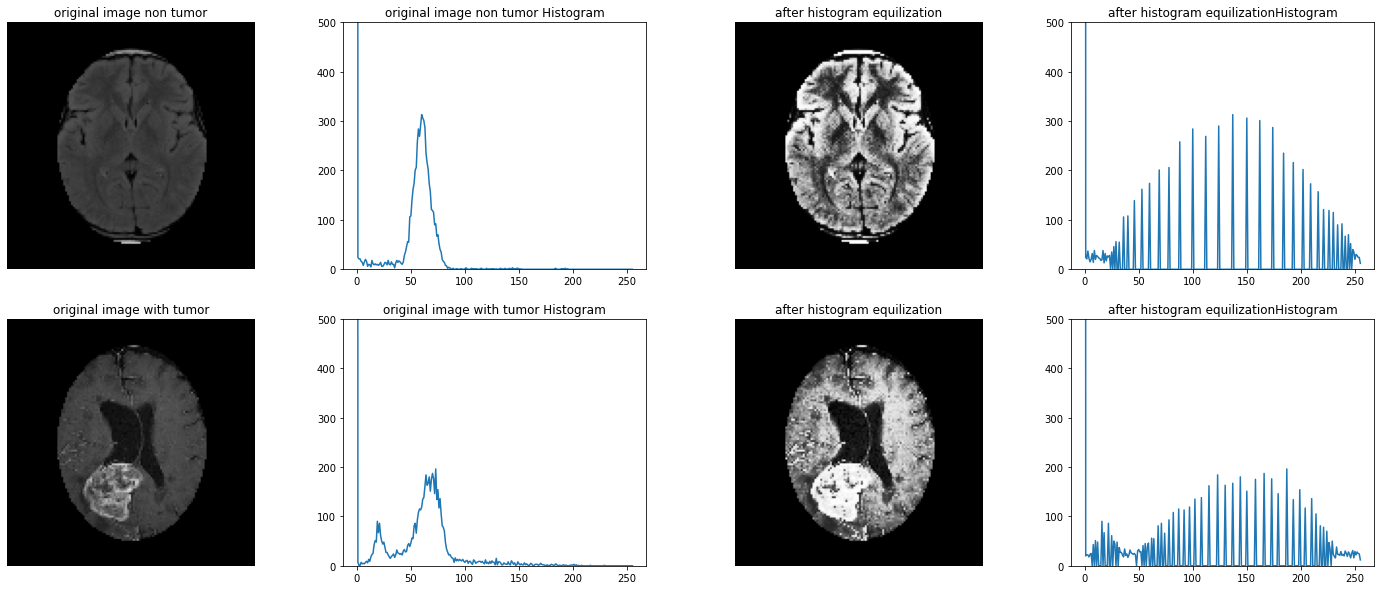

In [118]:
 Visualize(Histeq,'histogram equilization',True)

## Contrast Limited Adaptive Histogram Equilization 

In [119]:
Clahe=[]
for image in Img_data:
    G=image[:,:,1]
    
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(G)
    Clahe.append(clahe_img)


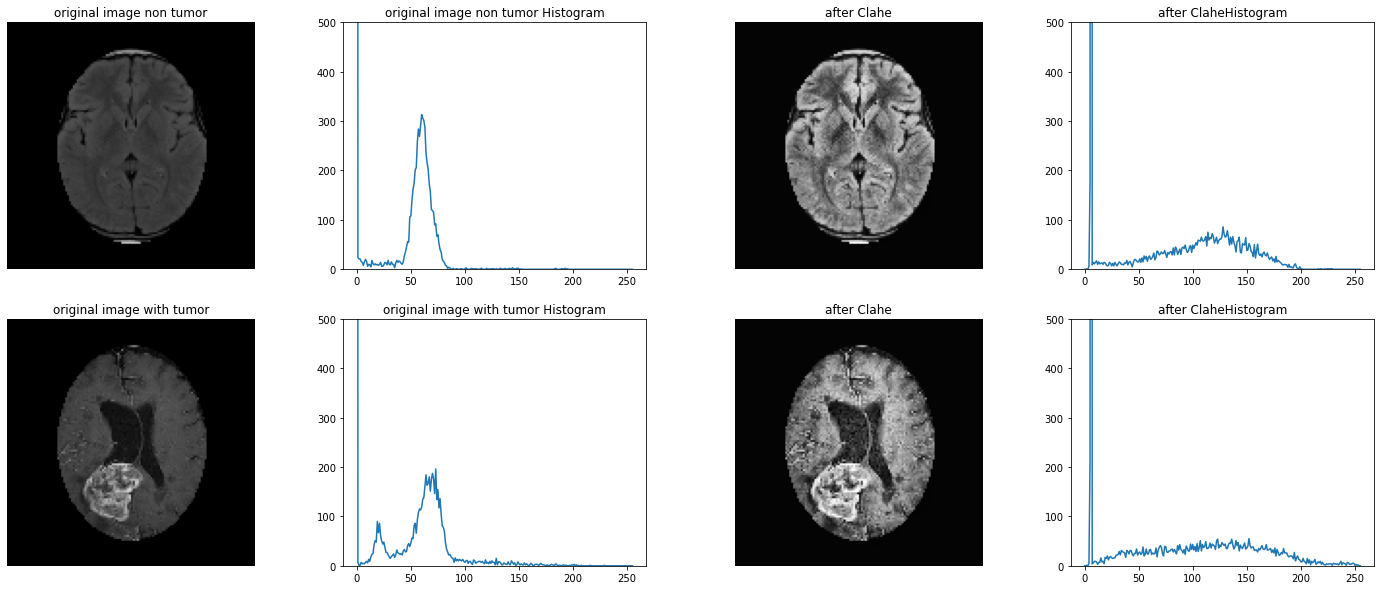

In [120]:
 Visualize(Clahe,'Clahe',True)

## GLCM based Features

In [32]:
# glcm=[]
# for image in grayscaled:
#     g=np.zeros((256,256))
    
    
#     for i in range(127):
        
#         for j in range(127):
            
#             g[image[i,j]][image[i,j+1]]=g[image[i,j]][image[i,j]]
    
#     glcm.append(g)


In [33]:
# import math
# entropy=[]
# for G in glcm:
#     H=0
#     h=hist(G)
#     l=sum(h)
#     hh=[j/l for j in h]
#     for i in hh:
#         H=H-i*math.log10(i)
#     entropy.append(H)

In [34]:
Energy = []
Correlation = []
Dissimilarity = []
Homogenity = []
Contrast = []
from skimage.feature import greycomatrix, greycoprops
def energy(img):
    img = np.array(img)
    GLCM = greycomatrix(img, [1], [0])
    return greycoprops(GLCM, 'energy')[0]
def correlation(img):
    img = np.array(img)
    GLCM = greycomatrix(img, [1], [0])
    return greycoprops(GLCM, 'correlation')[0]

def dissimilarity(img):
    img = np.array(img)
    GLCM = greycomatrix(img, [1], [0])

    return greycoprops(GLCM, 'dissimilarity')[0]

def homogenity(img):
    img = np.array(img)
    GLCM = greycomatrix(img, [1], [0])
    return greycoprops(GLCM, 'homogeneity')[0]

def contrast(img):
    img = np.array(img)
    GLCM = greycomatrix(img, [1], [0])
    return greycoprops(GLCM, 'contrast')[0]

for img in Img_data:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Energy.append(energy(img)[0])
    Correlation.append(correlation(img)[0])
    Dissimilarity.append(dissimilarity(img)[0])
    Homogenity.append(homogenity(img)[0])
    Contrast.append(contrast(img)[0])

In [35]:
# entropy=np.array(entropy)
# entropy

# Finding Statistical Features

In [36]:
sobel_mean=[]
sobel_std=[]

for image in SOBEL:
    sobel_mean.append(np.mean(image))
    sobel_std.append(np.std(image))
    

In [37]:
print(sobel_mean[1])
print(sobel_std[5])

0.0
1064.6048804094416


In [38]:
clahe_mean=[]
clahe_std=[]

for image in Clahe:
    clahe_mean.append(np.mean(image))
    clahe_std.append(np.std(image))
print(clahe_mean[1])
print(clahe_std[5])
    

41.77978515625
66.91993894162918


In [39]:
Histeq_mean=[]
Histeq_std=[]

for image in Histeq:
    Histeq_mean.append(np.mean(image))
    Histeq_std.append(np.std(image))
print(Histeq_mean[1])
print(Histeq_std[1])
    

48.36962890625
77.07822221169488


In [40]:
thresholded_mean=[]
thresholded_std=[]

for image in thresholded:
    thresholded_mean.append(np.mean(image))
    thresholded_std.append(np.std(image))
print(thresholded_mean[1])
print(thresholded_std[5])
    

21.4365234375
46.98639503588726


In [41]:
erosion_mean=[]
erosion_std=[]

for image in erosion:
    erosion_mean.append(np.mean(image))
    erosion_std.append(np.std(image))
print(erosion_mean[1])
print(erosion_std[5])
    

24.04119873046875
53.856013582965076


In [42]:
grayscaled_mean=[]
grayscaled_std=[]

for image in grayscaled:
    grayscaled_mean.append(np.mean(image))
    grayscaled_std.append(np.std(image))
print(grayscaled_mean[1])
print(grayscaled_std[5])
    

21.588623046875
46.87747893609328


In [43]:
len(grayscaled_mean)

3031

## Creating Dataframe of Statistical and GLCM Features

In [44]:
df=pd.DataFrame({"Grayscale_mean":grayscaled_mean,"Grayscale_std":grayscaled_std,
                        "Erosion_mean":erosion_mean,"Erosion_std":erosion_std,
                        "Histeq_mean":Histeq_mean,"Histeq_std":Histeq_std,"Clahe_mean":clahe_mean,
                        "Clahe_std":clahe_std,"Sobel_mean":sobel_mean,"Sobel_std":sobel_std,
                        "Energy":Energy,"Correlation":Correlation,"Dissimilarity":Dissimilarity,
                        "Homogenity":Homogenity,"Contrast":Contrast})
df

,Grayscale_mean,Grayscale_std,Erosion_mean,Erosion_std,Histeq_mean,Histeq_std,Clahe_mean,Clahe_std,Sobel_mean,Sobel_std,Energy,Correlation,Dissimilarity,Homogenity,Contrast
0,49.260559,72.699102,57.978333,82.661437,47.611145,76.502489,56.270691,77.425770,0.0,1724.811351,0.619444,0.920213,9.521038,0.651397,846.941806
1,21.588623,30.255007,24.041199,33.370134,48.369629,77.078222,41.779785,53.767364,0.0,655.698820,0.619383,0.934275,3.372539,0.702750,120.785679
2,32.985229,46.758864,40.733582,53.972287,48.026611,77.102937,51.822754,69.096106,0.0,978.924549,0.619276,0.915081,7.150591,0.651575,372.787771
3,33.252747,44.497478,37.725891,49.469102,48.384216,77.476845,52.349060,67.554096,0.0,764.428711,0.619312,0.961124,4.287771,0.663624,154.480315
4,27.874634,41.883380,32.807434,47.124956,47.980286,76.656919,46.272888,63.016187,0.0,919.310293,0.619283,0.941874,5.188238,0.662577,204.819390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,42.994507,62.250843,51.484375,71.844738,47.763672,76.501407,52.351257,70.644006,0.0,1042.694836,0.619253,0.941905,8.047613,0.647000,452.097687
3027,43.423584,60.269960,51.029602,67.989632,47.810242,76.875657,56.078247,75.144723,0.0,1119.728141,0.619328,0.950874,7.029897,0.654041,358.234990
3028,28.457703,43.586202,40.077332,55.662924,47.763428,76.615309,50.180664,69.607776,0.0,939.221037,0.619251,0.833253,10.867741,0.635937,636.402559
3029,38.279236,60.459846,48.391785,71.095951,47.049316,76.153080,51.417908,72.432622,0.0,1464.704144,0.623312,0.883239,10.061270,0.654647,857.619218


## Spliiting Data and Standardization

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
image_train, image_test, label_train, label_test = train_test_split(df, 
                                        np.array(Img_label), test_size=0.25, random_state=1)
stdSc = StandardScaler()
image_train = stdSc.fit_transform(image_train)
image_test = stdSc.transform(image_test)
image_train = np.asarray(image_train).astype('float32')
label_train = np.asarray(label_train)
image_test = np.asarray(image_test).astype('float32')
label_test = np.asarray(label_test)

In [47]:
print(f"Number of train_images:{len(image_train)} \nNumber of test_images: {len(image_test)}")

Number of train_images:2273 
Number of test_images: 758


In [48]:
image_train=pd.DataFrame(image_train)
image_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.565305,1.652700,1.476226,1.567241,0.041988,1.422417,1.753973,1.990350,0.0,2.105070,0.438045,0.290217,0.447270,0.879539,0.836423
1,-0.708595,-0.805693,-0.844740,-0.926115,0.133813,0.030658,-0.523795,-0.741395,0.0,-0.716786,-0.149343,0.451444,-0.764527,0.146013,-0.746415
2,-0.663990,-0.524208,-0.853906,-0.691167,0.204485,0.019301,-0.308634,-0.634880,0.0,-0.298676,-0.180088,0.357986,-0.672983,0.542007,-0.581265
3,1.698540,1.721890,2.131762,2.042127,-0.111734,-0.232078,0.436218,0.714685,0.0,0.972762,-0.179730,-0.594463,2.540543,-1.451153,2.632984
4,-1.020411,-0.993985,-1.212038,-1.112861,0.513809,-0.050213,-1.405565,-1.572077,0.0,-0.762992,-0.170339,0.447194,-0.914349,0.819250,-0.808868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,-1.074664,-1.126622,-1.153070,-1.178887,0.312555,0.066689,-1.037748,-1.190707,0.0,-0.996765,-0.180234,0.407115,-0.833884,0.058728,-0.835611
2269,-0.439045,-0.297517,-0.132875,-0.148036,-0.818656,-0.655492,-0.346127,0.092712,0.0,0.655398,0.187633,-0.733946,0.509493,-0.529476,0.326810
2270,0.031866,0.268117,0.497481,0.592287,-0.252607,-0.393155,0.123328,0.369114,0.0,1.273904,-0.179283,-1.368454,1.626435,-1.093893,1.574572
2271,1.231426,0.995855,0.915919,0.810922,0.083147,-0.125207,0.828416,0.792505,0.0,0.592149,-0.185017,0.554213,-0.207832,-0.287818,-0.041705


In [49]:
from sklearn.decomposition import PCA
pca = PCA(0.98)
image_train1 = pca.fit_transform(image_train)
image_test1 = pca.transform(image_test)

In [50]:
image_train1=pd.DataFrame(image_train1)
image_train1

,0,1,2,3,4,5
0,4.356358,-1.260552,1.410616,1.420464,0.447094,-0.626035
1,-2.265991,-0.419184,-0.046188,-0.319805,-0.030365,-0.095237
2,-1.825034,-0.458937,0.147477,-0.002425,0.293686,-0.171317
3,5.058132,1.471972,-1.369772,-0.008733,0.375155,1.418457
4,-3.381430,-0.328852,-0.132198,-0.020077,0.859821,0.212295
...,...,...,...,...,...,...
2268,-3.138113,-0.285661,-0.423041,-0.332642,0.105222,-0.038274
2269,0.099181,1.608779,-0.246485,-0.160343,0.072472,-0.575113
2270,2.155246,1.927338,-1.428768,0.355769,0.283391,-0.334551
2271,2.088693,-0.857722,0.641930,-0.711722,-0.001923,0.001137


In [51]:
image_test1=pd.DataFrame(image_test1)
image_train1

,0,1,2,3,4,5
0,4.356358,-1.260552,1.410616,1.420464,0.447094,-0.626035
1,-2.265991,-0.419184,-0.046188,-0.319805,-0.030365,-0.095237
2,-1.825034,-0.458937,0.147477,-0.002425,0.293686,-0.171317
3,5.058132,1.471972,-1.369772,-0.008733,0.375155,1.418457
4,-3.381430,-0.328852,-0.132198,-0.020077,0.859821,0.212295
...,...,...,...,...,...,...
2268,-3.138113,-0.285661,-0.423041,-0.332642,0.105222,-0.038274
2269,0.099181,1.608779,-0.246485,-0.160343,0.072472,-0.575113
2270,2.155246,1.927338,-1.428768,0.355769,0.283391,-0.334551
2271,2.088693,-0.857722,0.641930,-0.711722,-0.001923,0.001137


## Applying various models on Dataframe

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_recall_fscore_support

def run_model(model_name):

    mdl=''
    
    if model_name == 'Logistic Regression':

        mdl = LogisticRegression()

    elif model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=500 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=9 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':

        mdl = GaussianNB()

    mdl.fit(image_train1, label_train)
    y_pred = mdl.predict(image_test1)

    accuracy = round(accuracy_score(label_test, y_pred) * 100, 2)



    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    return accuracy


result={}  

In [53]:
a1=run_model('Logistic Regression')
result["Logistic Regression"]=a1

Test Accuracy Score of Basic Logistic Regression: % 69.0


In [54]:
a2=run_model("Random Forest")
result["Random Forest"]=a2
list[a2.feature_importance]

Test Accuracy Score of Basic Random Forest: % 93.93


AttributeError: 'numpy.float64' object has no attribute 'feature_importance'

In [57]:
a3=run_model('Support Vector Classifer')
result["SVM"]=a3

Test Accuracy Score of Basic Support Vector Classifer: % 79.55


In [58]:
a4=run_model('Decision Tree Classifier')
result["Decison Tree"]=a4

Test Accuracy Score of Basic Decision Tree Classifier: % 89.18


In [59]:
a5=run_model('K Nearest Neighbour')
result["KNN"]=a5

Test Accuracy Score of Basic K Nearest Neighbour: % 84.43


In [60]:
result

{'Logistic Regression': 69.0,
 'Random Forest': 93.93,
 'SVM': 79.55,
 'Decison Tree': 89.18,
 'KNN': 84.43}

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 800,criterion="entropy",max_depth=12, random_state=0)
clf.fit(image_train, label_train)


RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=800,
                       random_state=0)

In [62]:
ypr=clf.predict(image_test)
accuracy=(sum(ypr==label_test)/3031)*100
accuracy
round(accuracy_score(label_test, ypr) * 100, 2)

93.67

In [63]:
L=list(clf.feature_importances_)
L1={}

for i in range(len(L)):
    if L[i] in L1:
        pass
    else:
        L1[L[i]]=i
print(L1)
for j in sorted(L1.keys(),reverse=True):
    print(L1[j],end=" ")

{0.08635748652048207: 0, 0.0698701537161515: 1, 0.05907169427112012: 2, 0.05565259642478662: 3, 0.05363732239671237: 4, 0.058336840215364394: 5, 0.11542619760692022: 6, 0.10848488284773318: 7, 0.0: 8, 0.09740214868932572: 9, 0.04852826505811602: 10, 0.08466451309367033: 11, 0.05406879292626598: 12, 0.060364528997364976: 13, 0.04813457723598641: 14}
6 7 9 0 11 1 13 2 5 3 12 4 10 14 8 

# ANN

In [64]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from keras.models import Sequential
from keras.layers import Dense
import itertools
# from keras.utils import to_categorical

In [65]:
classifier = Sequential()
layer_info = Dense(activation='relu', input_dim=15, units=50)
classifier.add(layer_info)
# layer_info = Dense(activation='relu', units=6)
# classifier.add(layer_info)
layer_info = Dense(activation='relu', units=30)
classifier.add(layer_info)
layer_info = Dense(activation='sigmoid',units=1)
classifier.add(layer_info)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(image_train, label_train, batch_size=50, epochs=50)


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6212 - accuracy: 0.6529
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.6881
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7290
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7611
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7703
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7888
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7985
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8082
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8214
Epoch 10/50
46/46 [==============================] - ETA: 0s - loss: 0.3966 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4

In [66]:
flag_prediction = classifier.predict(image_test).round()
# flag_prediction.dtype
tn, fp, fn, tp = confusion_matrix(label_test, flag_prediction).ravel()
print("True Negative =",tn)
print("False Positive =",fp)
print("False Negative =",fn)
print("True Positive =",tp)
print(confusion_matrix(label_test, flag_prediction))
print(accuracy_score(label_test, flag_prediction)*100)

True Negative = 356
False Positive = 26
False Negative = 43
True Positive = 333
[[356  26]
 [ 43 333]]
90.89709762532982


In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

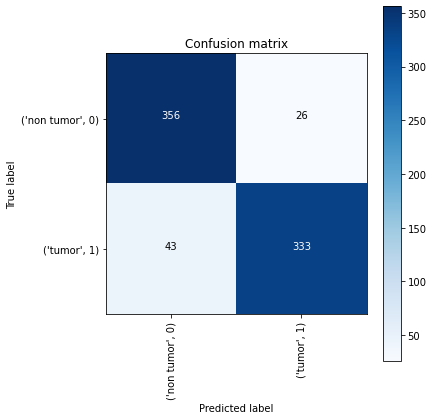

In [68]:
cm = plot_confusion_matrix(confusion_matrix(label_test, flag_prediction), classes = list(labels.items()), normalize=False)

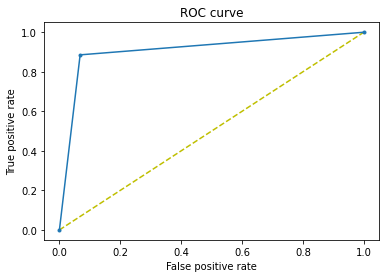

In [69]:
from sklearn.metrics import roc_curve
ypr = flag_prediction.ravel()

fpr, tpr, thresholds = roc_curve(label_test, ypr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [70]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
ideal_thresh=ideal_roc_thresh['thresholds']
print("Ideal threshold is: ", ideal_thresh) 
list(ideal_thresh)

Ideal threshold is:  1    1.0
Name: thresholds, dtype: float32


[1.0]

Val Accuracy = 0.50


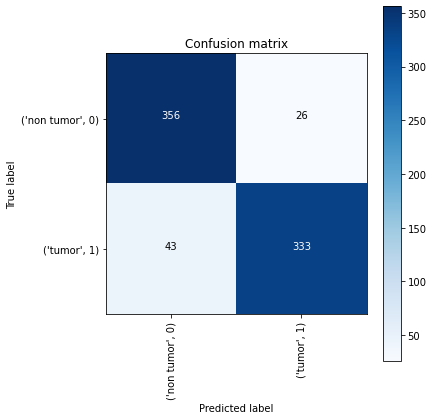

In [71]:
predictions = [1 if x>list(ideal_thresh)[0] else 0 for x in flag_prediction ]

accuracy = accuracy_score(label_test, predictions)
print('Val Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(label_test, flag_prediction ) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)

In [73]:
result["ANN"]=accuracy_score(label_test, flag_prediction)*100
result["VGG16"]=90.033


In [74]:
result

{'Logistic Regression': 69.0,
 'Random Forest': 93.93,
 'SVM': 79.55,
 'Decison Tree': 89.18,
 'KNN': 84.43,
 'ANN': 90.89709762532982,
 'VGG16': 90.033}

## Comparison Plot

In [75]:
acc=list(result.values())
acc

[69.0, 93.93, 79.55, 89.18, 84.43, 90.89709762532982, 90.033]

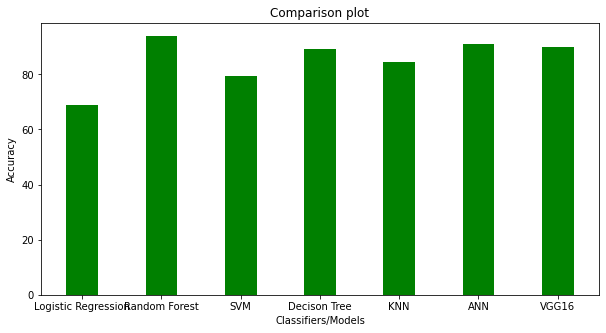

In [76]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(result.keys()), list(result.values()),width = 0.4,color="green")
plt.xlabel("Classifiers/Models")
plt.ylabel("Accuracy")
plt.title("Comparison plot") 
plt.show()

In [126]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [125]:

import cv2
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

 
class FCM():
    def __init__(self, image, n_clusters, m, epsilon, max_iter):
        '''Modified Fuzzy C-means clustering
        <image>: 2D array, grey scale image.
        <n_clusters>: int, number of clusters/segments to create.
        <m>: float > 1, fuzziness parameter. A large <m> results in smaller
             membership values and fuzzier clusters. Commonly set to 2.
        <max_iter>: int, max number of iterations.
        '''

        #-------------------Check inputs-------------------
        if np.ndim(image) != 2:
            raise Exception("<image> needs to be 2D (gray scale image).")
        if n_clusters <= 0 or n_clusters != int(n_clusters):
            raise Exception("<n_clusters> needs to be positive integer.")
        if m < 1:
            raise Exception("<m> needs to be >= 1.")
        if epsilon <= 0:
            raise Exception("<epsilon> needs to be > 0")

        self.image = image
        self.n_clusters = n_clusters
        self.m = m
        self.epsilon = epsilon
        self.max_iter = max_iter

        self.shape = image.shape # image shape
        self.X = image.flatten().astype('float') # flatted image shape: (number of pixels,1) 
        self.numPixels = image.size
       
    #--------------------------------------------- 
    def initial_U(self):
        U=np.zeros((self.numPixels, self.n_clusters))
        idx = np.arange(self.numPixels)
        for ii in range(self.n_clusters):
            idxii = idx%self.n_clusters==ii
            U[idxii,ii] = 1        
        return U
    
    def update_U(self):
        '''Compute weights'''
        c_mesh,idx_mesh = np.meshgrid(self.C,self.X)
        power = 2./(self.m-1)
        p1 = abs(idx_mesh-c_mesh)**power
        p2 = np.sum((1./abs(idx_mesh-c_mesh))**power,axis=1)
        
        return 1./(p1*p2[:,None])

    def update_C(self):
        '''Compute centroid of clusters'''
        numerator = np.dot(self.X,self.U**self.m)
        denominator = np.sum(self.U**self.m,axis=0)
        return numerator/denominator
                       
    def form_clusters(self):      
        '''Iterative training'''        
        d = 100
        self.U = self.initial_U()
        if self.max_iter != -1:
            i = 0
            while True:             
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                d = np.sum(abs(self.U - old_u))
                print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        else:
            i = 0
            while d > self.epsilon:
                self.C = self.update_C()
                old_u = np.copy(self.U)
                self.U = self.update_U()
                d = np.sum(abs(self.U - old_u))
               # print("Iteration %d : cost = %f" %(i, d))

                if d < self.epsilon or i > self.max_iter:
                    break
                i+=1
        self.segmentImage()


    def deFuzzify(self):
        return np.argmax(self.U, axis = 1)

    def segmentImage(self):
        '''Segment image based on max weights'''

        result = self.deFuzzify()
        self.result = result.reshape(self.shape).astype('int8')

        return self.result

In [ ]:
z=FCM(Img_data1[1555][:,:,1],2,2,0.3,10)
z.form_clusters()
result=z.result

In [ ]:
plt.imshow(Img_data1[1555][:,:,1],cmap="gray")

In [ ]:
plt.imshow(result,cmap='gray')


In [ ]:
result = result.astype('uint8')

In [ ]:
d= cv2.dilate(255-result,kernel,iterations = 2)

In [ ]:
plt.imshow(255-d,cmap='gray')

In [ ]:
z.dtype

In [ ]:
import numpy as np

def padding(img,pad):

    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

def AdaptiveMedianFilter(img,s=3,sMax=7):

    if len(img.shape) == 3:
        raise Exception ("Single channel image only")

    H,W = img.shape
    a = sMax//2
    padded_img = padding(img,a)

    f_img = np.zeros(padded_img.shape)
    for i in range(a,H+a+1):
        for j in range(a,W+a+1):
            value = Lvl_A(padded_img,i,j,s,sMax)
            f_img[i,j] = value

    return f_img[a:-a,a:-a] 

def Lvl_A(mat,x,y,s,sMax):

    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    A1 = Zmed - Zmin
    A2 = Zmed - Zmax

    if A1 > 0 and A2 < 0:
        return Lvl_B(window)
    else:
             return Zmed

def Lvl_B(window):

    h,w = window.shape
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    Zxy = window[h//2,w//2]
    B1 = Zxy - Zmin
    B2 = Zxy - Zmax

    if B1 > 0 and B2 < 0 :
        return Zxy
    else:
        return Zmed

In [ ]:
I=Img_data1[1555][:,:,1]
zz=AdaptiveMedianFilter(I,s=3,sMax=7)

In [ ]:
plt.imshow(zz,cmap="gray")


In [ ]:
ff=FCM(zz,2,2,0.3,10)
ff.form_clusters()
ff=ff.result

In [ ]:
plt.imshow(ff,cmap='gray')

In [ ]:
d= cv2.dilate(255-result,kernel,iterations = 2)

In [ ]:
plt.imshow(d,cmap='gray')

In [ ]:
x=[]
y=[]

In [ ]:
address='I:/New/xyz'
D='I:/New/xyz1'
os.chdir(D)
for i,Img_name in enumerate(os.listdir(address)):
#     Img_name.replace(Img_name,f"no {1500+i}.jpg")
    I = cv2.imread(address+'/'+Img_name)
    cv2.imwrite(f"no {1501+i}.jpg",I)
#     I = cv2.resize(I,(255,255))
#     I = cv2.normalize(I, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
#     x.append(I)
#     y.append(i)
#     Img_label.append(labels[label])


In [ ]:
np.arange(2)

In [ ]:

def initial_U(numPixels,n_clusters):
    idx=np.arange(numPixels)
    print("idx",idx,end=" ")
    U=np.zeros((numPixels, n_clusters))
    for ii in range(n_clusters):
        idxii = idx%n_clusters==ii
        U[idxii,ii] = 1        
    return U

In [ ]:
initial_U((3,3),2)